In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fbprophet

import datetime as dt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = pd.read_csv('model - Sheet2.csv')
data

,Date,Average
0,2021-01-01,3.754167
1,2021-01-02,3.735294
2,2021-01-03,3.750000
3,2021-01-04,3.730769
4,2021-01-05,3.715517
...,...,...
115,2021-04-26,2.900000
116,2021-04-27,2.875000
117,2021-04-28,3.000000
118,2021-04-29,3.250000


In [12]:
data = data[:100]
data

,Date,Average
0,2021-01-01,3.754167
1,2021-01-02,3.735294
2,2021-01-03,3.750000
3,2021-01-04,3.730769
4,2021-01-05,3.715517
...,...,...
95,2021-04-06,2.700000
96,2021-04-07,2.729167
97,2021-04-08,2.717391
98,2021-04-09,2.727273


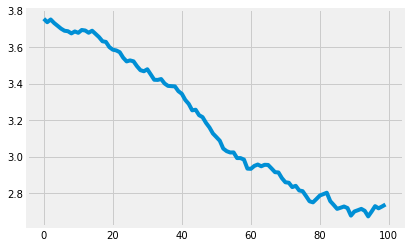

In [6]:
data['Average'].plot()

In [9]:
prophet_df = data.copy()
prophet_df.rename(columns={'Average': 'y', 'Date': 'ds'}, inplace=True)

prophet_df.head()

,ds,y
0,2021-01-01,3.754167
1,2021-01-02,3.735294
2,2021-01-03,3.750000
3,2021-01-04,3.730769
4,2021-01-05,3.715517


In [10]:
m = fbprophet.Prophet()

m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# Create Future dates
fut_prices = m.make_future_dataframe(periods=100)

# Predict Prices
forecast = m.predict(fut_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
195,2021-07-15,2.351484,1.505452,3.162855
196,2021-07-16,2.345912,1.489830,3.167551
197,2021-07-17,2.343758,1.469691,3.177010
198,2021-07-18,2.344018,1.453600,3.190092
199,2021-07-19,2.333667,1.429972,3.180718


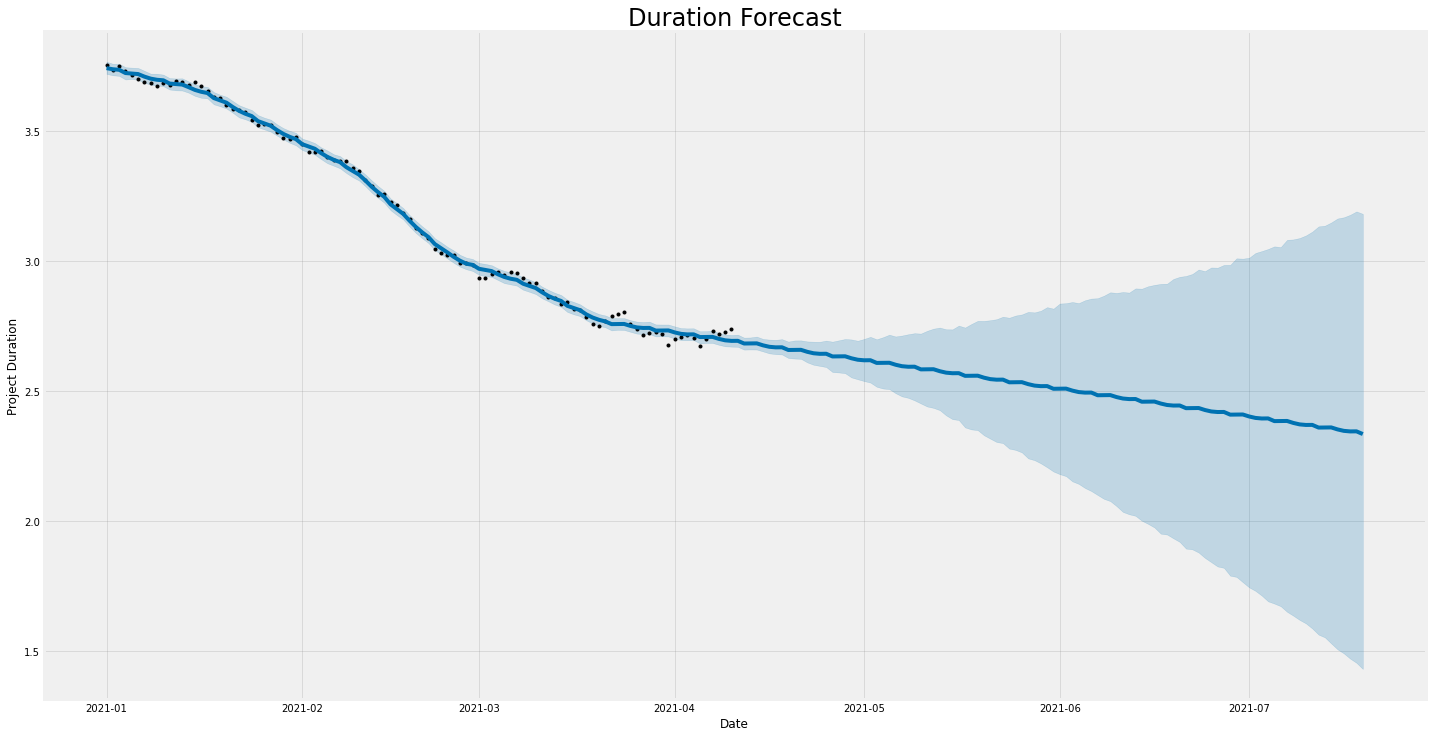

In [14]:
import datetime as dt
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2021, 1, 1)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2020, 4, 10)
trend_date1 = mdates.date2num(trend_date)

fig = m.plot(forecast, figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_title("Duration Forecast", fontsize=24)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Project Duration", fontsize=12)

plt.show()